Oppgave

En bedrift produserer goder med følgende produktfunksjon:

𝑥=𝑓(𝑁,𝐾)=𝑁0.5𝐾0.5(1)

På kort sikt har bedriften tilgang til begrenset kapital 𝐾0=10
. Prisen per enhet kapital er fast 𝑟=500 NOK, mens én time med arbeidskraft koster 𝑤=350 NOK. På kort sikt kan bedriften velge hvor mange timer arbeidskraft som tilsettes. Bedriften leier et bygg til produksjonen av produktet, og dette koster 10 000 NOK (faste kostnader).

OPPGAVE 1a

Finn et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen: 𝐶𝑠(𝑥,𝐾0). Tegn denne funksjon i en figur med produksjon på den horisontale aksen. Tegn også kostnadsfunksjonen som oppstår når kapitalbeholdningen økes til 𝐾1=50. Kommenter dine funn.

In [184]:

#importerer pakker.
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [185]:
# definer symboler. X blir produksjonsmålet, lmda er Lagrange multiplikatoren

N,K,x,lmda,w,r=sp.symbols('N K x \lambda, w, r', real=True, positive=True)

In [186]:
#Definerer produktfunksjonen.

def f(N,K):
    return (N**0.5)*(K**0.5)

In [187]:
#Legger inn verdiene fra oppgaven

K_0 = 10
K_1 = 50
w = 350
r = 500
fk = 10000

In [188]:
#Lambdifyer for at matplotlib skal skjønne tallene.

n_der = sp.lambdify(
    (x,K),
    sp.solve(sp.Eq(f(N,K), x), N)[0])

In [189]:
def C(N,K):
    return w*n_der(N, K) +r*K +fk

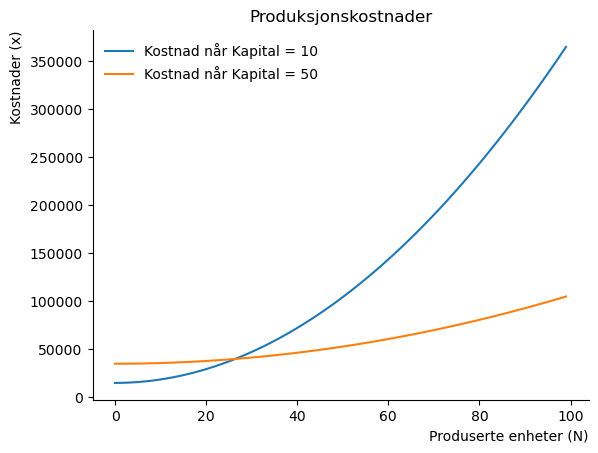

In [190]:
n=np.linspace(0.1,100,100)

fig1, ax = plt.subplots()
ax.set_ylabel('Kostnader (x)', loc='top')
ax.set_xlabel('Produserte enheter (N)', loc='right')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

#plott funksjonen

ax.plot(C(n, K_0), label='Kostnad når Kapital = 10')
ax.plot(C(n, K_1), label='Kostnad når Kapital = 50')

# tittel
ax.set_title('Produksjonskostnader')

#vis navnene på plottene:
ax.legend(loc='best',frameon=False);

OPPGAVE 1b

I en ny figur tegn totale gjennomsnittskostnader på kort sikt, variabler gjennomsnittskostnader på kort sikt, og grensekostnaden på kort sikt. Kommenter og forklar forholdet mellom total og variabel gjennomsnittskostnad og grensekostnaden.

In [191]:
#Finner Grensekostnaden

grensekost = sp.lambdify(
    (N,K),
    sp.diff(C(N, K),N)
)

In [192]:
#Finner Gjennomsnittskostnaden med faste kostnader

def gjennomsnittskost(N,K):
    return C(N,K)/N

In [193]:
#Finner Gjennomsnittskostnaden uten faste kostnader

def gjennomsnittufk(N,K):
    return (C(N,K)-fk)/N

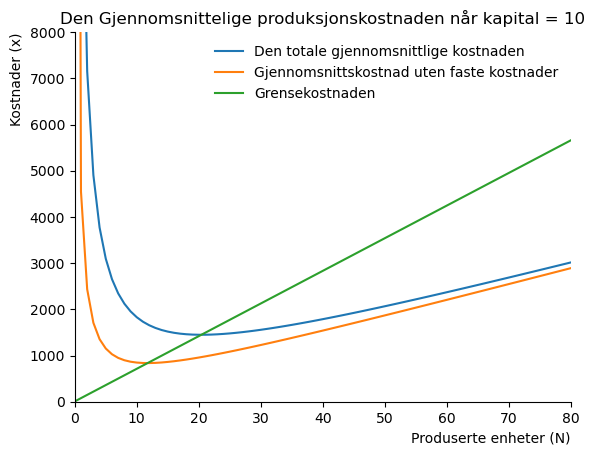

In [194]:
fig1, ax = plt.subplots()
ax.set_ylabel('Kostnader (x)', loc='top')
ax.set_xlabel('Produserte enheter (N)', loc='right')

ax.set(xlim=(0, 80))
ax.set(ylim=(0, 8000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

#plott funksjonen

ax.plot(gjennomsnittskost(n, K_0), label='Den totale gjennomsnittlige kostnaden')
ax.plot(gjennomsnittufk(n, K_0), label='Gjennomsnittskostnad uten faste kostnader')
ax.plot(grensekost(n, K_0), label='Grensekostnaden')

# tittel
ax.set_title('Den Gjennomsnittelige produksjonskostnaden når kapital = 10')

#vis navnene på plottene:
ax.legend(loc='best',frameon=False);

Legger merke til hvor grensekostnads linjen krysser gjennomsnitsskostnads linjene. Dette viser oss hvor mange enheter som kan produseres til lavest mulig gjennomsnittskostnad med og uten faste kostnader. Vi ser at uten faste kostnader så kan blir det billigere å produsere ekstra enheter og at den har et laver bunnpunkt en den totale gjennomsnittlige kostnaden. Grensekostnaden krysser bunnpunktet til begge gjennomsnittslige kostands linjene (med og uten faste kostnader).

OPPGAVE 1c

Hvilke skalaegenskaper viser denne produktfunksjon?

Denne produktfunksjonen viser oss et konstant skalautbytte. Dette kan vi kjenne igjen med at grensekostnads linjen er en rett linje som øker lineært. Den sier oss også at det blir dyrere for hver nye enhet de produserer over tid.

OPPGAVE 2

Hvorfor er det relative forholdet mellom K og N i en optimal løsning kun avhengig av økonomiske faktorer her, og ikke produksjonselastisitetene (dvs faktorer fra produktfunksjonen)?

In [218]:

q,a,N,K,X,lmda,w,r=sp.symbols('a b N K X \lambda, w, r', real=True, positive=True)

def x(N,K):
    return (N**q)*(K**a)
x(N,K)

# Lagrange likning
L=w*N + r*K-lmda*(x(N,K)-X)

# deriver mhp N og K
dL_N=sp.diff(L,N)
dL_K=sp.diff(L,K)
foc_N=sp.Eq(dL_N,0)
foc_K=sp.Eq(dL_K,0)

# da kan vi skrive den rel prisen på arbeidskraft (w/r) som
rel_w=(dL_N.args[0]/dL_K.args[0])

# og mtsb som
mtsb=(dL_N.args[1]/dL_K.args[1])

# sett disse lik som i likning (7)
optimal=sp.Eq(rel_w,mtsb)
display(optimal)

Eq(w/r, K*a/(N*b))

Dette er fordi det er et konstant skala utbytte og at det er proposjonale endringer mellom faktorene og mengden som blir produsert.
Samtidig som MTSB ligger langs den samme isokostlinjen.